# EZNet Training Results Baseline

7/4/18: Trying to make EZNet converge and produce meaningful results. This has shown some difficulty, that is possibly exacerbated by the amount of imbalance within the classes of EZ/not-EZ.

In [9]:
%matplotlib inline
# import basic functionality / libs
import sys
import os
import numpy as np
import pandas as pd
import json
import scipy
import pickle

# Import magic commands for jupyter notebook 
# - autoreloading a module
# - profiling functions for memory usage and scripts
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%load_ext memory_profiler

sys.path.append('../../../')
import dnn
from dnn.base.utils.log_error import initialize_logger
from dnn.base.constants.config import Config

# import basic plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [10]:
training_resultsdir = '/Users/adam2392/Downloads/eznet_baseline_tcn/'

# set configurations
patients = [
#             'id001_bt',
#            'id002_sd', 'id003_cm', 'id004_bj', 
#            'id005_ft', 'id006_mr', 'id007_rd',
#            'id008_dmc', 'id009_ba', 'id010_cmn',
#            'id011_gr', 'id012_fl', 'id013_lk', 'id014_vc',
#            'id015_gjl', 'id016_lm', 'id017_mk',
#            'id018_lo', 'id019_rg', 'id020_lma',
            'id001_ac',
#     'id002_cj', 'id008_gc', 'id010_js', 
#             'id011_ml', 'id012_pc', 'id013_pg'
           ]

#  where to find the raw data for this patient
rawdatadir = os.path.join('/Volumes/ADAM LI/rawdata/',  patient)

output_folder = os.path.join(os.path.expanduser("~"), 
                    'Documents', 'figures', 
                    'dnn_eznet_preliminary_results')

/Users/adam2392/Downloads/eznet_baseline_tcn/id001_ac/output/eznet_history.pkl
dict_keys(['val_loss', 'loss', 'val_categorical_accuracy', 'categorical_accuracy'])
150


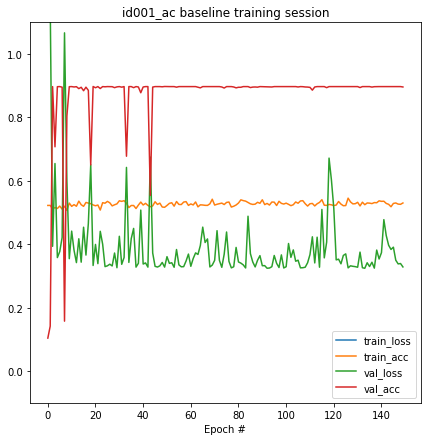

In [14]:
N = np.arange(0, 150)
loss = np.zeros((len(patients), 150))
acc = np.zeros(loss.shape)
val_acc = np.zeros(loss.shape)
val_loss = np.zeros(loss.shape)

# go through all patients
for idx, pat in enumerate(patients):
    # real data results directory
    resultsdir = os.path.join(training_resultsdir, pat, 'output')
    resultfiles = [f for f in os.listdir(resultsdir) if f.endswith('.pkl')]
    
    # extract data from each training session
    for _file in resultfiles:
        histfile = os.path.join(resultsdir, _file)
        print(histfile)
        # load in the history file
        with open(histfile, "rb") as f:
            history = pickle.load(f)
        print(history.keys())
        print(len(history['loss']))
        
        loss[idx, :] = history['loss']
        acc[idx, :] = history['categorical_accuracy']
        val_acc[idx,:] = history['val_categorical_accuracy']
        val_loss[idx,:] = history['val_loss']
        
for idx, pat in enumerate(patients):
    plt.figure(figsize=(7,7))
    plt.title('{} baseline training session'.format(pat))
    plt.plot(N, loss[idx,:], label="train_loss")
    plt.plot(N, acc[idx,:], label="train_acc")
    plt.plot(N, val_loss[idx,:], label="val_loss")
    plt.plot(N, val_acc[idx,:], label="val_acc")
    plt.xlabel('Epoch #')
    plt.ylim([-0.1, 1.1])
    plt.legend()